In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
digits = datasets.load_digits()

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import numpy as np
x = digits.data
y= digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [4]:
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(x_train, y_train) 
  
# Calculate the accuracy of the model 
print(knn.score(x_test, y_test)) 

0.9666666666666667


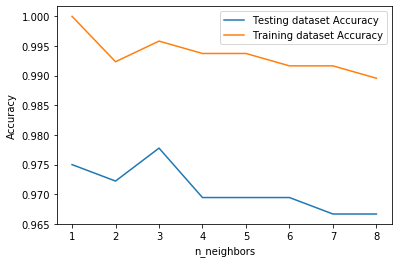

In [5]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train) 
      
 # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(x_train, y_train) 
    test_accuracy[i] = knn.score(x_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [6]:
print (test_accuracy)
print (train_accuracy)

[0.975      0.97222222 0.97777778 0.96944444 0.96944444 0.96944444
 0.96666667 0.96666667]
[1.         0.99234516 0.99582463 0.99373695 0.99373695 0.99164927
 0.99164927 0.98956159]


SVM

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# kernel ='linear'
SVC_linear = SVC(kernel='linear')
SVC_linear.fit(x_train, y_train)
y_linear_pred = SVC_linear.predict(x_test)
print(classification_report(y_test, y_linear_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.86      1.00      0.93        31
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        39
           4       0.95      0.97      0.96        36
           5       1.00      0.93      0.96        40
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        31
           8       0.97      0.89      0.93        35
           9       0.95      0.97      0.96        38

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [8]:
# kernel ='poly'
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(x_train, y_train)
y_poly_pred = SVC_poly.predict(x_test)
print(classification_report(y_test, y_poly_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.91      1.00      0.95        31
           2       1.00      1.00      1.00        37
           3       0.97      1.00      0.99        39
           4       0.97      1.00      0.99        36
           5       1.00      0.95      0.97        40
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        31
           8       1.00      0.91      0.96        35
           9       0.95      0.97      0.96        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



c:\users\toshiba\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
# kernal='sigmoid'
SVC_sigmoid = SVC(kernel='poly')
SVC_sigmoid.fit(x_train, y_train)
y_sigmoid_pred = SVC_sigmoid.predict(x_test)
print(classification_report(y_test, y_sigmoid_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.91      1.00      0.95        31
           2       1.00      1.00      1.00        37
           3       0.97      1.00      0.99        39
           4       0.97      1.00      0.99        36
           5       1.00      0.95      0.97        40
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        31
           8       1.00      0.91      0.96        35
           9       0.95      0.97      0.96        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



c:\users\toshiba\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Naive Bayes

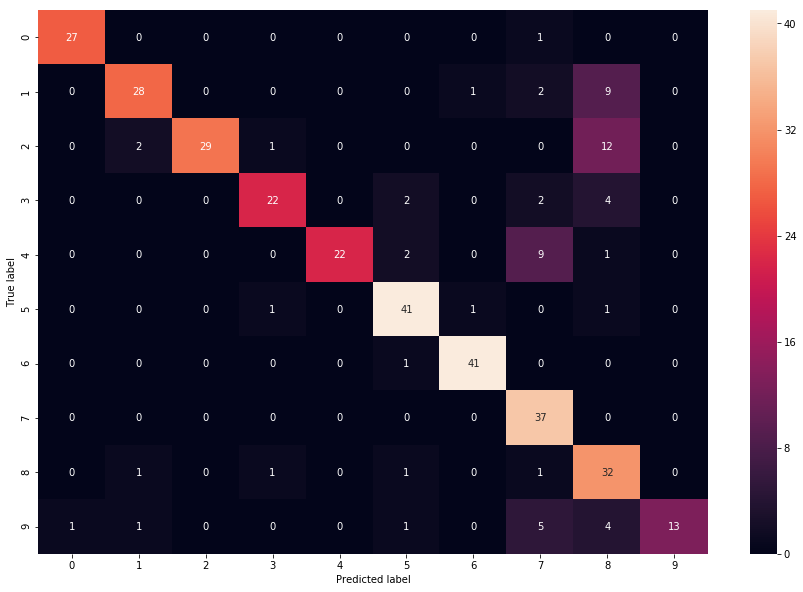

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(data=cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Text(0,0.5,'Accuracy')

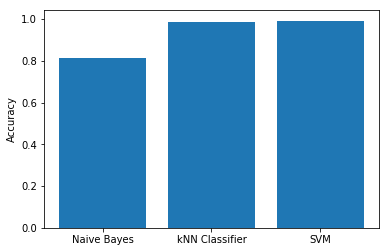

In [31]:
bayes_acc = accuracy_score(y_test, y_pred)
knn_acc = max(test_accuracy)
svm_acc = accuracy_score(y_test, y_poly_pred)

plt.bar(['Naive Bayes', 'kNN Classifier', 'SVM'],[bayes_acc, knn_acc, svm_acc])
plt.ylabel('Accuracy')

Regression

In [32]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [33]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 10.9+ KB


In [34]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


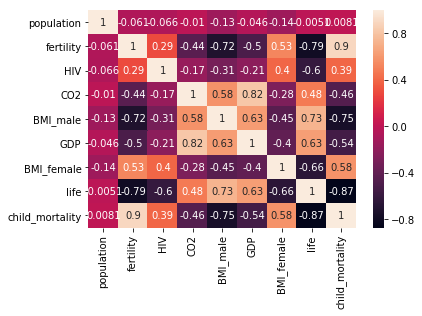

In [35]:
sns.heatmap(gapminder.corr(), annot=True)
plt.show()

In [36]:
X = gapminder['fertility'].values.reshape(-1,1)
y = gapminder['life'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

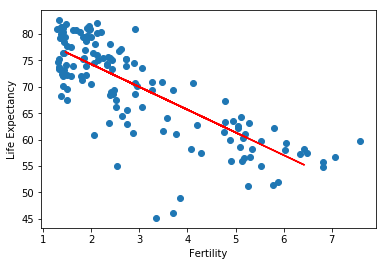

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(x='fertility', y='life', data=gapminder)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [39]:
lr.score(X_test, y_test)

0.4211114259478471

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=5)

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [41]:
X = gapminder.drop(['life', 'Region'], axis=1)
y = gapminder['life']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_all = lr.predict(X_test)
mean_squared_error(y_test, y_pred_all)

11.764257136079381

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=5)

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])